Simulating 0.25 seconds of activity over 2500 cycles.


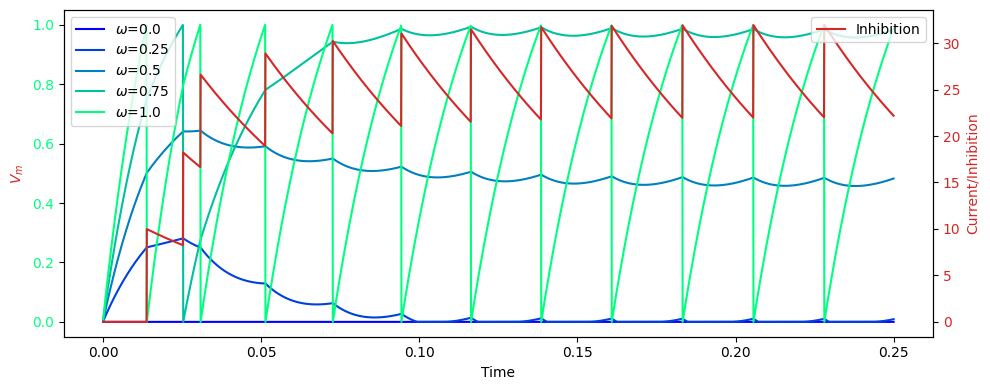

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from lif import LIFLayer

dt: float = 1e-4
runtime: float = 0.25
N: int = 5
T: int = int(runtime / dt)
print(f'Simulating {runtime} seconds of activity over {T} cycles.')

# create a layer of N neurons
#weights = torch.rand(size=(1, N))
weights = torch.linspace(0, 1, steps=N)
lif_layer = LIFLayer(weights, dt=dt)

# create a step input of size T
step_input = torch.ones((T, 1), dtype=torch.float32) * 1

# Preallocate tensor storage for outputs and inhibitory_states
v = torch.zeros(T, N)
activation = torch.zeros(T, 1)

# simulate the layer and store the outputs
time = torch.linspace(0, runtime, T)
for i, t in enumerate(time):
    spikes = lif_layer(step_input[i])
    v[i] = lif_layer.v
    activation[i] = lif_layer.activation

# Convert tensors to numpy for plotting
outputs_np = v.numpy()
activation = activation.numpy()

fig, ax1 = plt.subplots(figsize=(10, 4))

# Create colormap
cmap = plt.get_cmap('winter')  # Colormap that blends between pale pink and red
color_norm = mcolors.Normalize(vmin=min(weights), vmax=max(weights))  # Normalize omega values

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('$V_m$', color=color)
for i in range(N):
    color = cmap(color_norm(weights[i]))
    ax1.plot(time, outputs_np[:, i], label=f'$\omega$={weights[i]}', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Current/Inhibition', color='tab:red')  # we already handled the x-label with ax1
#ax2.plot(time, step_input.numpy(), color='tab:green', label='Input Current')
ax2.plot(time, activation, color='tab:red', label='Inhibition')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [2]:
dt: float = 1e-4
runtime: float = 0.1
N: int = 5
T: int = int(runtime / dt)
print(f'Simulating {runtime} seconds of activity over {T} cycles.')

# create a layer of N neurons
#weights = torch.rand(size=(1, N))
weights = torch.linspace(0, 1, steps=N)
lif_layer = LIFLayer(weights)

# create a step input of size T
step_input = torch.ones((T, 1), dtype=torch.float)

# Preallocate tensor storage for spike counts
spikes_count = torch.zeros((N,), dtype=torch.int)

# simulate the layer and store the outputs
time = torch.linspace(0, T * lif_layer.dt, T)
for i, t in enumerate(time):
    spikes = lif_layer(step_input[i])
    spikes_count += spikes.int()

# Convert tensors to numpy for plotting
spikes_count_np = spikes_count.numpy()

Simulating 0.1 seconds of activity over 1000 cycles.
